In [207]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy import random, linalg, dot, diag, all, allclose

w
 [2 3]

0.5

wPv
 [2. 0.]

w_perp_v
 [0. 3.]

w = w_perp_v + wPv
 [2. 3.]

dot product of w_perp_v and wPv should be 0: 0.0


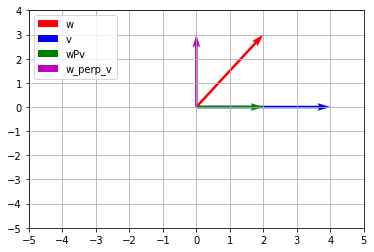

In [152]:
# Code challenge: decompose vector to orthogonal components

# Vector to be decomposed
w = np.array([2, 3])
print('w\n', w)
print()

# Vector v, the reference
v = np.array([4, 0])

# Compute w-parallel-to-v
wT = np.transpose(w)
vT = np.transpose(v)
beta = (np.dot(wT,v)) / (np.dot(vT,v))
print(beta)
print()
wPv = np.dot(beta,v)
print('wPv\n', wPv)
print()

# Compute w-orthogonal-to-v
w_perp_v = w - wPv
print('w_perp_v\n', w_perp_v)
print()

# Confirm results algebraically (sum to w, orthogonal components)
print('w = w_perp_v + wPv\n',w_perp_v + wPv)
print()

print('dot product of w_perp_v and wPv should be 0:', np.dot(w_perp_v, wPv))

# Plot all four vectors!
V = np.array([w])

origin = [0], [0] # origin point

plt.quiver(*origin, w[0], w[1], color=['r'], angles='xy', scale_units='xy', scale=1, label="w")
plt.quiver(*origin, v[0], v[1], color=['b'], angles='xy', scale_units='xy', scale=1, label="v")
plt.quiver(*origin, wPv[0], wPv[1], color=['g'], angles='xy', scale_units='xy', scale=1, label="wPv")
plt.quiver(*origin, w_perp_v[0], w_perp_v[1], color=['m'], angles='xy', scale_units='xy', scale=1, label="w_perp_v")
plt.grid()
#plt.plot(x, y1, "-b", label="sine")
#plt.plot(x, y2, "-r", label="cosine")
plt.legend(loc="upper left")
plt.xticks(range(-5, 6))
plt.yticks(range(-5, 5))

plt.show()


In [249]:
# 117. Code challenge: Gram-Schmidt algorithm

# Implement the GS procedure in code!
# Compute QR decomp. Compare with matrix G (G is the output matrix of the GS procedure)
# When you take GS matrix and multiply it by its transpose, you will get the identity
# matrix (if it's square) and if you don't, something is wrong in your code.

m = 4 # number of rows
n = 4 # number of columns

A = G = np.array( np.random.randn(m,n) )

print('A\n', A)
print()
print('G\n', G)
print()
print('a1\n', A[:,0])
print()
print()

for i in range(0, n):
    
    # Step one - orthogonalize
    for j in range(0, i):
        G[:,i] = G[:,i] - (np.dot(np.transpose(G[:,i]), G[:,j]) * G[:,j])
        #G[:,i] = G[:,i] - np.transpose(G[:,i]) * G[:,j] * G[:,j]

        # Step two - normalize
    G[:,i] = G[:,i] / np.linalg.norm(G[:,i], keepdims = True)

        
print('dot product of any given pair of columns should be 0: ',
      np.dot(G[:,i], G[:,i-1])) # dot product of any given pair of columns should be 0
print()
print('dot product of a column with itself should be 1: ',
      np.dot(G[:,i], G[:,i])) # dot product of a column with itself should be 1
print()
print('should produce identity matrix: \n', np.dot(np.transpose(G), G)) # should produce identity matrix
print()
print('G: \n', G)
print()


Q, R = np.linalg.qr(A)
print('---------------------------------------------')
print('Q: \n', Q)
print()
print('dot product of any given pair of columns should be 0: ',
      np.dot(Q[:,i], Q[:,i-1])) # dot product of any given pair of columns should be 0
print()
print('dot product of a column with itself should be 1: ',
      np.dot(Q[:,i], Q[:,i])) # dot product of a column with itself should be 1
print()
print('should produce identity matrix: \n', np.dot(np.transpose(Q), Q)) # should produce identity matrix
print()


A
 [[ 1.57764959e+00 -1.43533770e+00  1.85281302e+00  1.34791027e-01]
 [-2.28670339e-01  2.01229760e-02 -2.35496369e+00  1.31888273e+00]
 [ 1.29846007e+00 -4.32492973e-04  6.62490285e-01 -4.58471100e-01]
 [-3.82159860e-01  1.50404692e-01  1.56752698e+00 -7.95896404e-01]]

G
 [[ 1.57764959e+00 -1.43533770e+00  1.85281302e+00  1.34791027e-01]
 [-2.28670339e-01  2.01229760e-02 -2.35496369e+00  1.31888273e+00]
 [ 1.29846007e+00 -4.32492973e-04  6.62490285e-01 -4.58471100e-01]
 [-3.82159860e-01  1.50404692e-01  1.56752698e+00 -7.95896404e-01]]

a1
 [ 1.57764959 -0.22867034  1.29846007 -0.38215986]


dot product of any given pair of columns should be 0:  2.7755575615628914e-16

dot product of a column with itself should be 1:  1.0000000000000002

should produce identity matrix: 
 [[ 1.00000000e+00 -9.36750677e-17  5.55111512e-17 -1.66533454e-16]
 [-9.36750677e-17  1.00000000e+00 -4.16333634e-17 -1.19348975e-15]
 [ 5.55111512e-17 -4.16333634e-17  1.00000000e+00  3.10732343e-16]
 [-1.66533454e

In [287]:
# 119. Code challenge: Inverse via QR

# Generate a large (e.g., N=100) matrix and invert using QR and inv()

m = 4 # number of rows
n = 4 # number of columns

O = np.array( np.random.randn(m,n) )

print('O:\n', O)
print()
Oi = np.linalg.inv(O)
print('Oi:\n', Oi)
print()

# Compute inverse via QR
Q, R = np.linalg.qr(O)
print('Q function of O: \n', Q)
print()
print('R: \n', R)
print()

OiQR1 = np.dot(np.linalg.inv(R) , np.transpose(Q))
print('OiQR1: \n', OiQR1)
print()

# Mike creates another matrix that contains the vectorized version of all the matrices, then looks at image of them
# for comparison.
# Concantonate row wise, create image, visually inspect and run a correlation function.

Oi_v = np.asarray(Oi).ravel()
OiQr1_v = np.asarray(OiQR1).ravel()
print(len(Oi_v))
print(Oi_v)
print()
print(len(OiQr1_v))
print(OiQr1_v)
print()

print(np.corrcoef(Oi_v,OiQr1_v))

O:
 [[-2.1597007  -0.47412276 -0.15935843 -1.04472147]
 [-0.92089694  0.47498516  0.9139153   1.05646671]
 [-0.95102398  1.66311088 -0.85124468 -1.10142144]
 [-0.01675194 -0.86004384 -0.44586542 -0.32191868]]

Oi:
 [[-0.12111206 -0.5585267  -0.22374997 -0.67437367]
 [-0.14690598  0.03436768  0.30854348 -0.46611854]
 [ 0.84295588 -0.97507647 -0.92105446 -2.78430819]
 [-0.76873586  1.28775249  0.4630165   2.03034566]]

Q function of O: 
 [[-0.85255942  0.41220382 -0.11619303 -0.29954906]
 [-0.36353156 -0.17132715  0.76596162  0.5017914 ]
 [-0.37542445 -0.777971   -0.47038903  0.18042108]
 [-0.00661297  0.44214946 -0.42253537  0.79115358]]

R: 
 [[ 2.5331967  -0.38713933  0.12615204  0.92225752]
 [ 0.         -1.95093302  0.24283786  0.10289816]
 [ 0.          0.          1.30735045  1.5847209 ]
 [ 0.          0.          0.          0.38966448]]

OiQR1: 
 [[-0.12111206 -0.5585267  -0.22374997 -0.67437367]
 [-0.14690598  0.03436768  0.30854348 -0.46611854]
 [ 0.84295588 -0.97507647 -0.921

In [309]:
# 120 Code challenge: Prove and demonstrate the Sherman-Morrison Inverse

# Sherman-Morrison formula

m = 5
a = np.array( np.random.randn(m,1))
a = a / np.linalg.norm(a) # enable this line to prove failure mode
aT = np.transpose(a)


b = a # enable this line to prove failure mode

#b = np.array( np.random.randn(m,1))  # disable this line to prove failure mode
bT = np.transpose(b)
I = np.identity(m)
             
A = I - np.dot(a, bT)
Ai = I + np.dot(a, bT) / (1 - np.dot(aT, b))

# Proof :AA' = I
AAI = np.dot(A, Ai)


print("A:\n", A)
print()
print("Ai:\n", Ai)
print()
print("I:\n", I)
print()
print("AAI:\n", np.around(AAI))
print()

A:
 [[ 0.99128874  0.04459981  0.04222164  0.0620384   0.03185588]
 [ 0.04459981  0.77165831 -0.21616597 -0.31762362 -0.16309545]
 [ 0.04222164 -0.21616597  0.79536051 -0.30068718 -0.15439881]
 [ 0.0620384  -0.31762362 -0.30068718  0.55818507 -0.22686601]
 [ 0.03185588 -0.16309545 -0.15439881 -0.22686601  0.88350736]]

Ai:
 [[ inf -inf -inf -inf -inf]
 [-inf  inf  inf  inf  inf]
 [-inf  inf  inf  inf  inf]
 [-inf  inf  inf  inf  inf]
 [-inf  inf  inf  inf  inf]]

I:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

AAI:
 [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]



C:\Users\amiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


In [323]:
# 121. Code challenge: A^TA = R^TR

# Show that A'*A == R'*R (R from QR)
# 1) Generate a random matrix A
# 2) Compute its QR decomposition
# 3) Test the claim
# 4) Prove this statement using paper-and-pencil

m= 4
n = 4

A = np.array( np.random.randn(m,n))
AT = np.transpose(A)

Q, R = np.linalg.qr(A)
RT = np.transpose(R)

ATA = np.dot(AT, A)
RTR = np.dot(RT, R)

print('ATA:\n', ATA)
print()
print('RTR: \n', RTR)
print()
print(ATA - RTR)



ATA:
 [[ 3.58833644  2.02002911  1.49355777 -2.57250943]
 [ 2.02002911  3.58097267 -2.80121371 -0.17463273]
 [ 1.49355777 -2.80121371  6.27088266 -3.92564491]
 [-2.57250943 -0.17463273 -3.92564491  6.64465985]]

RTR: 
 [[ 3.58833644  2.02002911  1.49355777 -2.57250943]
 [ 2.02002911  3.58097267 -2.80121371 -0.17463273]
 [ 1.49355777 -2.80121371  6.27088266 -3.92564491]
 [-2.57250943 -0.17463273 -3.92564491  6.64465985]]

[[-8.88178420e-16  0.00000000e+00 -4.44089210e-16  4.44089210e-16]
 [ 0.00000000e+00  4.44089210e-16  4.44089210e-16 -1.11022302e-16]
 [-4.44089210e-16  4.44089210e-16  0.00000000e+00 -8.88178420e-16]
 [ 4.44089210e-16 -1.11022302e-16 -8.88178420e-16 -8.88178420e-16]]
